##### 6 Nov 2019 

# Data Visualization with `pyplot` (Cont'd)

#### Reading: 

* The tutorial at `matplotlib.org`
  * select `matplotlib` from the Help menu in a Jupyter notebook)
  * click on Tutorials, then Pyplot Tutorial

#### In this notebook: 

* bar charts
* histograms
* scatter plots (fancier dot plots)
* color maps

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

## Bar Charts 

A "bar chart", as the name implies, is a set of bars
* bars can be vertical (as in the example below) or horizontal

To make a chart:
* call a function named `bar`
* the first argument is a list of $x$ coordinates that define the left edges of the bars
* the second argument is a list of $y$ coordinates that specify the tops of the bars

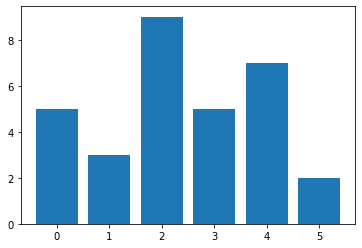

In [2]:
data = [5, 3, 9, 5, 7, 2]
x = list(range(len(data)))
plt.bar(x, data)
plt.show()

#### Details 

By default:
* bar thickness is set so the right edge of a bar is 80% of the way to the left edge of the next bar
* the bottom edge is at 0

Similarities with `plot`:
* the size of the graphic is determined automatically (pass additional arguments if you want to control them yourself)
* axes and tick marks are drawn automatically

One important difference:
* we have to pass a list of $x$ coordinates -- we can't just call `bar(data)` and have the function supply default $x$ values

## Bar Chart Options 

This example shows some of the "bells and whistles" available for bar charts

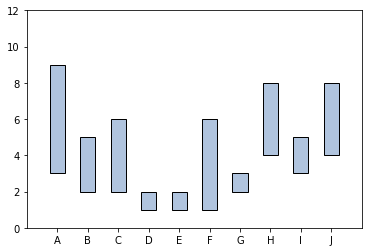

In [3]:
from random import randint
from string import ascii_uppercase

nbars = 10

loc = list(range(nbars))           # locations (x coords) of bars
b = []                             # box bottoms
h = []                             # box heights
s = []                             # label strings

for i in range(nbars):
    b.append(randint(1,5))
    h.append(randint(1,6))
    s.append(ascii_uppercase[i])   # will blow up if nbars > 26
    
plt.bar(
    loc, 
    bottom=b, 
    height=h, 
    width=0.5, 
    align='center', 
    color='lightsteelblue', 
    edgecolor='black', 
    tick_label=s
)

plt.axis([-1, nbars, 0, 12 ])
plt.show()

#### Details 

* the list of $x$ coordinates is the only required argument

* in this example, instead of passing a second argument with $y$ coordinates of the tops of boxes, we pass two **named arguments** (`bottom` and `height`) to show the lower and upper coordinates of each bar

* the `width` and `align` arguments specify the horizontal box size and placement 

* the box color and the color of the edge around a box can be different

* the `tick_label` argument is a list of strings

## Another Bar Chart Example 

This example makes groups of bars
* we want groups of 3 bars, with a horizontal space between each group
* there should be 5 groups in all

That means
* the first set should be at $x$ = 1, 5, 9, 13, 17
* the second should have $x$ = 2, 6, 10, 14, 18
* the third should have $x$ = 3, 7, 11, 15, 19

First, some experiments in sandbox cells to figure out how to make the `x` values

In [4]:
[n for n in range(5)]

[0, 1, 2, 3, 4]

In [5]:
[n for n in range(1,18,4)]

[1, 5, 9, 13, 17]

In [6]:
for i in range(3):
    x = [n+i for n in range(1,18,4)]
    print(x)

[1, 5, 9, 13, 17]
[2, 6, 10, 14, 18]
[3, 7, 11, 15, 19]


Here's the plot, using random values for the $y$ coordinates

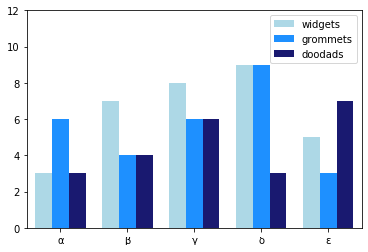

In [7]:
bar_colors = ['lightblue', 'dodgerblue', 'midnightblue']
bar_labels = ['widgets', 'grommets', 'doodads']
plt.axis([0,20,0,12])

for i in range(3):
    x = [n+i for n in range(1,18,4)]
    y = [randint(3,9) for i in range(len(x))]
    plt.bar(x, y, width=1, color=bar_colors[i], label=bar_labels[i])

ax = plt.gca()
ax.set_xticks([n for n in range(2,19,4)])   # set x label coords to match the middle bar
ax.set_xticklabels(['α','β', 'γ', 'δ', 'ε'])
plt.legend()
plt.show()

#### Details 

* the function named `gca` returns an "axis" object (`gca` = `get current axis`)
* methods for this object can set labels, tick marks, tick labels, etc

## Histograms 

A histogram looks like a bar chart
* each bar is a "bin" -- a collection of values that fall in a certain range
* pass a list of data values (of any length), the function will sort them into bins

The default number of bins is 10

The height of a bar is proportional to the number of items in the corresponding bin

### Example #1 

Make a list of 1000 numbers from a normal distribution
* use $\mu = 50$ and $\sigma = 10$
* expect most numbers to be within the range $30 < x < 70$ (two standard deviations from the mean)

If there are 10 bins, the first will have numbers from 0 to 10, the second from 10 to 20, and so on.

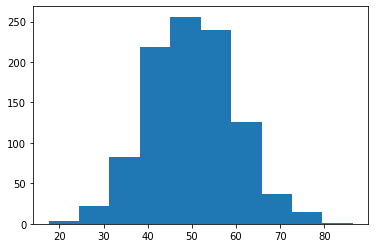

In [8]:
from random import normalvariate

a = [ normalvariate(50,10) for i in range(1000) ]

plt.hist(a)
#plt.hist(a, edgecolor='white')
plt.show()

#### Details 

* by default there is no space between the bars

* the $x$ labels are inferred from the data

* the height of a bar is the number of data points that fall in that bin

### Example #2 

With 100,000 values sorted into 100 bins we should see something a lot closer to a normal distribution

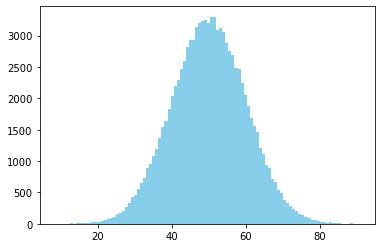

In [9]:
a = [ normalvariate(50,10) for i in range(100000) ]

plt.hist(a, bins=100, facecolor='skyblue')

plt.show()

In [10]:
print('smallest:', min(a))
print('largest: ', max(a))

smallest: 8.302656932013058
largest:  90.76708884095778


## Scatter Plots 

A scatter plot is basically the same as a "dot plot" (created by `plot`, using markers instead of lines)

The difference:
* in a dot plot, use the same **glyph** for each point, but in a scatter plot the appearance of each point can be based on the data

<img src="https:pages.uoregon.edu/conery/Bi410/glyphdef.png">

### Example: Classroom Size and Capacity 

Here is a function that will build classroom data for a "virtual university".  Each room has four attributes:
* width
* depth
* capacity (number of chairs)
* college (a random int between 1 and n, the number of colleges in the university)

The function returns four separate lists, all the same length (the number of rooms), that we can pass to the plot functions.

In [23]:
from random import normalvariate, randint

def build_university(nrooms, ncolleges):
    colleges = [ ]
    widths = [ ]
    depths = [ ]
    capacities = [ ]
    i = 0
    while i < nrooms:
        x = normalvariate(30,5)             # choose a random size
        if x > 0:
            w = int(normalvariate(x,5))     # width, depth, and capacity are related
            d = int(normalvariate(x,5))     # to the starting size
            widths.append(w)
            depths.append(d)
            capacities.append(d*w/5)
            colleges.append(randint(1,ncolleges))
            i += 1
    return colleges, widths, depths, capacities

Create the lists for a university with 50 rooms randomly assigned to 8 colleges:

In [24]:
college, width, depth, cap = build_university(50, 8)

In [25]:
width[0:10]

[43, 44, 43, 41, 30, 26, 33, 26, 36, 20]

In [26]:
depth[0:10]

[41, 24, 31, 43, 27, 19, 35, 24, 30, 29]

### Basic Dot Plots with `scatter` 

The first plot uses the `scatter` function to plot all rooms, just using their width and depth to place the dots.
    

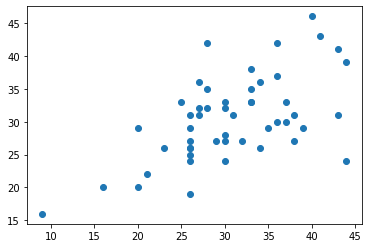

In [27]:
plt.scatter(width, depth)
plt.show()

We can also control the size (`s`) and color (`c`) of the dots
* `alpha` specifies the transparency of each dot, and is a number between 0 (invisible) and 1 (opaque).

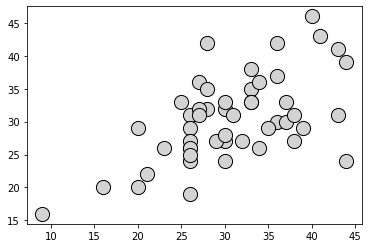

In [28]:
plt.scatter(
    width, 
    depth, 
    s=200,                    # <- size for every dot
    c="lightgray", 
    edgecolors="black"
)
plt.show()

### Glyph Size Based on Data

If we pass a list of numbers as the value of `s` those numbers will determine the size of each glyph.

In this example the size of a dot will be determined by the capacity of the room

In [29]:
print('width:', width[0:10], '...')
print('depth:', depth[0:10], '...')
print('cap:  ', cap[0:10], '...')

width: [43, 44, 43, 41, 30, 26, 33, 26, 36, 20] ...
depth: [41, 24, 31, 43, 27, 19, 35, 24, 30, 29] ...
cap:   [352.6, 211.2, 266.6, 352.6, 162.0, 98.8, 231.0, 124.8, 216.0, 116.0] ...


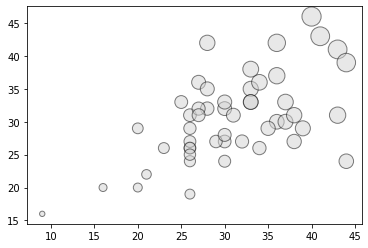

In [30]:
plt.scatter(
    width, 
    depth, 
    s=cap,               # <-- change "s=20" to "s=cap"
    c="lightgray", 
    edgecolors="black", 
    alpha=0.5)
plt.show()

**Note:**  Each glyph in this plot conveys three pieces of information about a room:
* room **width** (location on the $x$-axis)
* room **depth** (location on the $y$-axis)
* room **capacity** (area of the dot)

### Color as an Attribute 

We can also color each glyph based on an attribute of the data

In this example, the color of a circle is determined by the college the room belongs to
* in this data set a college is a random number between 1 and 9

In [31]:
print('width:   ', width[0:10], '...')
print('depth:   ', depth[0:10], '...')
print('college: ', college[0:10], '...')

width:    [43, 44, 43, 41, 30, 26, 33, 26, 36, 20] ...
depth:    [41, 24, 31, 43, 27, 19, 35, 24, 30, 29] ...
college:  [6, 1, 1, 3, 3, 6, 6, 4, 4, 4] ...


The argument named `c` is a list of color numbers, where the length of the list is the same length as the $x$ and $y$ coordinate lists
* see "color maps" at the end of this notebook for an explanation of how the library picks which colors to use for each college number

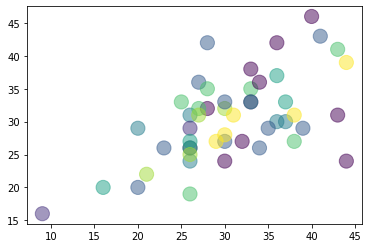

In [32]:
plt.scatter(width, depth, c=college, s=200, alpha=0.5)
plt.show()

**Note:**  Each glyph in this plot also conveys three pieces of information about a room:
* room **width** (location on the $x$-axis)
* room **depth** (location on the $y$-axis)
* college (one of 8 colors, with a different color for each college)

### Displaying All Four Attributes 

This plot uses all four attributes of each data point
* glyph location ($x$ and $y$ coordinates) determined by room size (width and depth)
* the area of a glyph is determined by the capacity of a room
* the color depends on the college

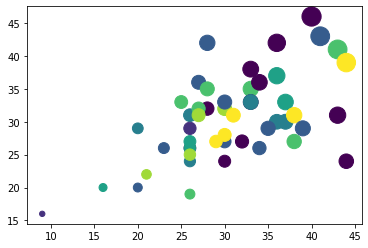

In [33]:
plt.scatter(width, depth, s=cap, c=college)
plt.show()

## Color Maps 

In the examples above the `scatter` function chose colors for each college using a **color map**
* the default map is named "Viridis"
* designed so that every point in the spectrum is perceived as equally intense

If we have 8 colors, the library chooses 8 equally spaced locations along the spectrum

<img src="https:pages.uoregon.edu/conery/Bi410/viridis_8.png">

See [Color Map Reference](https://matplotlib.org/gallery/color/colormap_reference.html) in the Pyplot documentation for more information
* you can choose a different color map from the predefined collection ("plasma", "rainbow", "twilight", _etc_)
* you can also define your own, use RGB values

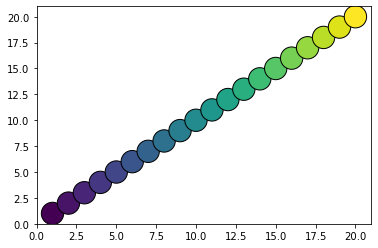

In [35]:
n = 20

x = list(range(1,n+1))

plt.scatter(x, x, c=x, s=500, edgecolors="black")
plt.axis([0,n+1,0,n+1])
plt.show()

### Why Viridis? 

The default color map is **perceptually uniform**
* see [Choosing Colormaps in Matplotlib](https://matplotlib.org/tutorials/colors/colormaps.html)

As we move from left to right along the scale, intensity of the color increases linearly

The "classic" colormaps like Rainbow and Jet have peaks in the middle, which makes the colors subjective
* viewers give more importance to the brighter colors

<img src="https://pages.uoregon.edu/conery/Bi410/perceptually_uniform_colormaps.jpg" />

<img src="https://pages.uoregon.edu/conery/Bi410/misc_colormaps.jpg" />